In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')
##plt → This refers to matplotlib.pyplot, a Python library used for plotting
##'fivethirtyeight' is a predefined style in Matplotlib that makes plots look similar to those used by the FiveThirtyEight news website.
#It features clean visuals, bold colors, and gridlines for better readability

In [3]:
end = datetime.now()#Current date and time
start = datetime(end.year-15,end.month,end.day) # 15 years before the current date 
stock='BTC-USD'
stock_data=yf.download(stock,start=start,end=end)
#fetches historical Bitcoin price data from Yahoo Finance using the yfinance library


[*********************100%***********************]  1 of 1 completed


In [4]:
#first few rows of the Bitcoin price dataset downloaded from Yahoo Finance
stock_data.head()
#Close :The official closing price of Bitcoin for the day
#High	:The highest price Bitcoin reached that day
#Low	The lowest price Bitcoin reached that day
#Open	The price at which Bitcoin started trading that day
#Volume	Total number of Bitcoin transactions that day

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [5]:
#last 5 rows of the downloaded Bitcoin price data
'''
Date	The specific date of the price data.
Open	The Bitcoin price at the start of the trading day.
High	The highest Bitcoin price reached that day.
Low	    The lowest Bitcoin price reached that day.
Close	The Bitcoin price at the end of the trading day.
Price	Typically the same as Close or Adj Close.
Volume	The number of Bitcoins traded that day.'''
stock_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-01-29,103703.210938,104750.804688,101283.820312,101317.523438,47432049818
2025-01-30,104735.304688,106418.765625,103321.648438,103709.335938,41915744521
2025-01-31,102405.023438,106026.351562,101543.882812,104737.562500,45732764360
2025-02-01,100655.906250,102755.726562,100297.710938,102402.796875,27757944848
2025-02-03,93971.742188,97618.640625,92584.960938,97618.640625,92603990016


In [6]:
stock_data.describe().T


,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Close,BTC-USD,3792.0,2.028419e+04,2.325992e+04,1.781030e+02,1.262905e+03,9.455880e+03,3.211484e+04,1.061463e+05
High,BTC-USD,3792.0,2.071422e+04,2.373580e+04,2.117310e+02,1.274280e+03,9.633277e+03,3.319284e+04,1.091149e+05
Low,BTC-USD,3792.0,1.978760e+04,2.271304e+04,1.715100e+02,1.239328e+03,9.258813e+03,3.066489e+04,1.052917e+05
Open,BTC-USD,3792.0,2.026002e+04,2.323053e+04,1.768970e+02,1.253550e+03,9.446590e+03,3.208063e+04,1.061473e+05
Volume,BTC-USD,3792.0,1.889310e+10,2.066261e+10,5.914570e+06,4.703027e+08,1.483281e+10,3.005358e+10,3.509679e+11


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3792 entries, 2014-09-17 to 2025-02-03
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3792 non-null   float64
 1   (High, BTC-USD)    3792 non-null   float64
 2   (Low, BTC-USD)     3792 non-null   float64
 3   (Open, BTC-USD)    3792 non-null   float64
 4   (Volume, BTC-USD)  3792 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 177.8 KB


In [8]:
stock_data.columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [9]:
closing_price=stock_data[['Close']]

In [10]:
closing_price['Close']

Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2025-01-29,103703.210938
2025-01-30,104735.304688
2025-01-31,102405.023438


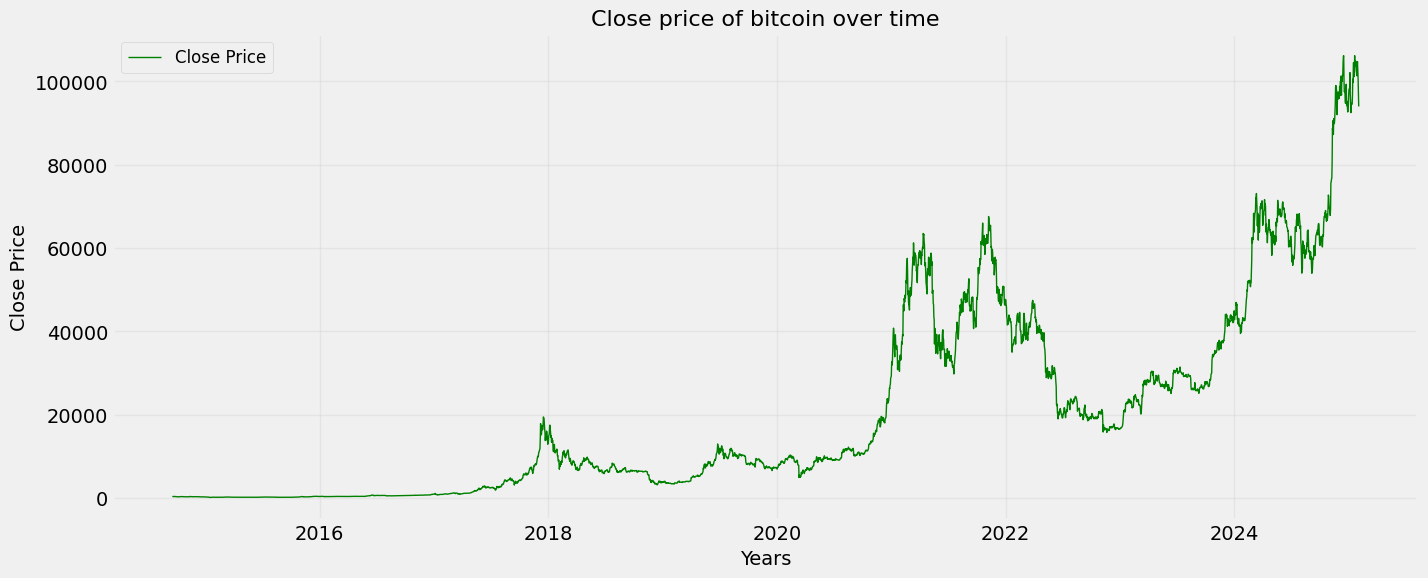

In [20]:
#plotting  closing price 
plt.figure(figsize=(15,6))#15 inches wide and 6 inches tall for better readability
#
plt.plot(closing_price.index, closing_price['Close'], label='Close Price', color='green', linewidth=1)
plt.title("Close price of bitcoin over time", fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Close Price", fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()
